# Objective :
    
Here our main target is to make  Comparision Among those Category. How  does al the feature
values varies within those Groups.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

import plotly as py
import plotly.express as px
import cufflinks as cf
from plotly.offline import iplot,plot, download_plotlyjs, init_notebook_mode
cf.go_offline()



In [ ]:
init_notebook_mode()

In [ ]:
df = pd.read_csv('android-games.csv')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

Here our DataFrame does not contsins any null values.But here we are seeing that, the units of installs
column is in million and we  have to take only numeric value  to analyze our data.

In [ ]:
def resamble(num):
    if str(num).endswith('M'):
        num = num[:-2]
        #i = num.str.split(' ').str[0]
        return float(num)
        
        
    elif str(num).endswith('k'):
        num = num[:-2]
        #i = num.str.split(' ').str[0]
        return float(num)/1000

In [ ]:
df['installs'] = df['installs'].apply(resamble)

In [74]:
df['installs'].unique()

array([5.e+02, 1.e+02, 5.e+01, 1.e+01, 5.e+00, 1.e+00, 1.e+03, 5.e-01,
       1.e-01])

In [75]:
Total_install = df.groupby( by = 'category').sum().reset_index()

In [76]:
Total_install

,category,rank,total ratings,installs,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,GAME ACTION,5050,413375744,6650.0,424.61,145253.9,256.9,0.99,297452920,35916052,19841780,10979830,49184898,1.0
1,GAME ADVENTURE,5050,91971748,1888.0,426.42,3086.8,430.5,4.99,64842466,10346242,5166538,2465012,9151238,1.0
2,GAME ARCADE,5050,185167028,6931.0,429.49,2324.2,309.1,9.48,133731783,19444747,10465943,4933625,16590675,2.0
3,GAME BOARD,5050,47085352,2038.0,434.71,15732.8,450.1,0.00,33858033,5161875,2318092,1089300,4657803,0.0
4,GAME CARD,6190,39256812,1401.0,539.37,247.5,349.4,2.99,27947247,5493676,1977608,828199,3009779,1.0
5,GAME CASINO,5050,37119268,788.5,443.78,222.6,335.2,0.00,27483010,4135281,1864141,776339,2860250,0.0
6,GAME CASUAL,5223,254644844,6847.0,442.19,2016.7,214.1,0.00,184839112,29302683,13746256,6098993,20657546,0.0
7,GAME EDUCATIONAL,5050,14243583,1595.5,425.36,9956.9,1363.6,0.00,10100353,1342086,786736,472206,1541962,0.0
8,GAME MUSIC,5050,22451222,1285.6,418.03,247.7,700.6,1.99,15479053,2300539,1378286,731653,2561432,1.0
9,GAME PUZZLE,5050,98392699,3631.0,439.42,223.2,215.3,0.00,70822310,12818911,5837564,2354690,6558971,0.0


In [77]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


x = Total_install['category']
y = Total_install['total ratings']

# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Total ratings in BarChart',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y, y=x,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Total ratings in linePlot',
), 1, 2)

fig.update_layout(
    title='Total ratings of each category',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=25000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(150, 200, 25)',
    plot_bgcolor='rgb(248, 200, 220)',
)


fig.show()


Observations:

    Here we are seeing that Action types game are having most numbers of rating.If you do make a         rank.
    
    1. Game Acction.
    2. Game Causal.
    3. Game Archade.
    4. Game Strategy.

In [78]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


x = Total_install['category']
y = Total_install['installs']

# Creating two subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(go.Bar(
    x=y,
    y=x,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Number of installation in BarChart',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=y, y=x,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Number of installation in linePlot',
), 1, 2)

fig.update_layout(
    title='Number of installation of each category',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
        dtick=25000,
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(150, 245, 245)',
    plot_bgcolor='rgb(140, 20, 2)',
)


fig.show()


Observations:
    
Here some interesting point to notice is Instead of having most numbers rating Action  Game  does not 
contains highest numbers of installation. Archade and Causal types of game almost equally           installed much more then others.Game like Car racing, Sports are also installed in a descent numbers. One point to  notice is People are not interested in educational of game.Let's have this rank......
    
    1. Game Archade.
    
    2. Game Causal.
    
    3. Game Action.
    
    4. Game Racing.
    
    5. Game Sports.

In [79]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(
    y=Total_install['category'],
    x=Total_install['growth (30 days)'],
    name='Growth in 1 month',
    orientation='h',
    marker=dict(
        color='rgba(246, 78, 139, 0.6)',
        line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=Total_install['category'],
    x=Total_install['growth (60 days)'],
    name='Growth within 2 months',
    orientation='h',
    marker=dict(
        color='rgba(58, 71, 80, 0.6)',
        line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',template = "plotly_dark",
                  title_text="Growth of each category with respect to Month ")
fig.show()

Observations:
    
Game Acton and Game Word have the Highest numbers of growth in the 30 days.Most of the types of game have higher growth in 30 days. But there are also some games which has higher growth in 60 days.

Games having Higher growth in 60 days.

1. Game Sports.

2. Game Simulation.

3. Game Rool Playing.

4. Game Puzzle.

5. Game Music.


    

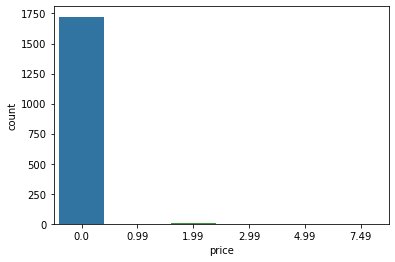

In [80]:
sns.countplot(x = df['price'], data = df)

Here we are seeing that most of the games are free.

In [82]:
import plotly.graph_objects as go

x = Total_install['category']
fig = go.Figure(go.Bar(x=x, y=Total_install['5 star ratings'], name='5 Star'))
fig.add_trace(go.Bar(x=x, y=Total_install['4 star ratings'], name='4 Star'))
fig.add_trace(go.Bar(x=x, y=Total_install['3 star ratings'], name='3 Star'))
fig.add_trace(go.Bar(x=x, y=Total_install['2 star ratings'], name='2 Star'))
fig.add_trace(go.Bar(x=x, y=Total_install['1 star ratings'], name='1 Star'))





fig.update_layout(barmode='stack',template = "plotly_dark",
                  title_text="Rating distribution of different types of game", xaxis = {'categoryorder':'total descending'})
fig.show()

Obserbations:
    
Here we are seeing the rating in descending order. Action Game are  having top most ratings in all ratings type.
And here another point to notice is The amount of ratings with respect to type,

5 star are top most 

then 1 star,

then 4 star,

then 3 star and 2 star.

In [83]:
sns.countplot(x = df['paid'], data=df)

ValueError: could not broadcast input array from shape (7,15) into shape (7)

In [ ]:
category =Total_install['category']
#seats = [303,52,23,22,22,18,16,12,10, 65]
Five_star = df['5 star ratings']
Four_star = df['4 star ratings']
Three_star = df['3 star ratings']
import plotly.graph_objs as go
data1 = {
   "values": Five_star,
   "labels": category,
   "domain": {"column": 0},
   "name": " 5 Star",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data2 = {
   "values": Four_star,
   "labels": category,
   "domain": {"column": 1},
   "name": "4 star",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}

data3 = {
   "values": Three_star,
   "labels": category,
   "domain": {"column": 2},
   "name": "4 star",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data = [data1, data2]
layout = go.Layout(
   {
      "title":"Ratings on differtnt types of Game",
      "grid": {"rows": 2, "columns": 2},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "5 Star",
            "x": 0.20,
            "y": 0.5
         },
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "4 Star",
            "x": 0.8,
            "y": 0.5
         },
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "3 Star",
            "x": 0.8,
            "y": 0.5
         } 
        
          
      ]
   }
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)  

In [16]:
x = df.index


In [22]:
parties = ['BJP', 'CONGRESS', 'DMK', 'TMC', 'YSRC', 'SS', 'JDU','BJD', 'BSP','OTH']
seats = [303,52,23,22,22,18,16,12,10, 65]
percent = [37.36, 19.49, 2.26, 4.07, 2.53, 2.10, 1.46, 1.66, 3.63, 25.44]
import plotly.graph_objs as go
data1 = {
   "values": seats,
   "labels": parties,
   "domain": {"column": 0},
   "name": "seats",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data2 = {
   "values": percent,
   "labels": parties,
   "domain": {"column": 1},
   "name": "vote share",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
data = [data1,data2]
layout = go.Layout(
   {
      "title":"Parliamentary Election 2019",
      "grid": {"rows": 1, "columns": 2},
      "annotations": [
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "seats",
            "x": 0.20,
            "y": 0.5
         },
         {
            "font": {
               "size": 20
            },
            "showarrow": False,
            "text": "votes",
            "x": 0.8,
            "y": 0.5
         }
      ]
   }
)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=Total_install['growth (30 days)'],
            y=Total_install['category'],
            orientation='h'))
fig.update_layout(template = "plotly_dark",
                  title_text="Growth in 30 days ")

fig.show()
